# Advanced_Feature_Selection_Techniques_Machine_Learning_Models

What is the feature selection?

Feature selection is the process of choosing the best features for your model.
This process might differ from one technique to another, but the mail goal is to find
out which features have more impact on your model.



Why should we do feature selection?

Because sometimes, having too many features might harm machine learning model.

For example: these features might be related to each other, which can cause multicollinearity, ruining your model`s
    performance.
    
    Another potential issue is related to computational power. The presence of too many features necessitates
    more computational power to execute the task concurrently, which could require more resources and
    consequntly, increased costs.
    

Which Feature Selection Method will be better for my model?

It`s not easy to give a generic answer. The choice of feature selection model relies on the type of data you have
and the aim of your project.
For example, filter-based methods such as the chi-squared test or mutual information gain are typically
used for feature selection in categorical data. 
The warapper-based methods like forward or backward selection are suitalbe for numerical data.

Lasso regression, decision trees, and random forest can handle both types of data quite well.

In terms of supervised and unsupervised feature selection, supervised methods like recursive feature elimination
or decision trees are good for labeled data.

Unsupervised methods like principal component analysis(PCA) or independent component analysis(ICA)are
used for unlabeled data.



# Information Gain: is a statistic that measures the reduction in entropy(uncertainty) for a specific feature
    by diving the data according to that characteristic. It is often used in decision tree algorithms and also
    has useful features. The higher a feature`s information gain, the more useful it is for decision-making
    

In [81]:
#let`s apply information gain by using a prebuilt diabetes dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

#load the diabetes dataset
data=load_diabetes()

#split the dataset into features and target 
X=data.data
y=data.target

In [2]:
X.shape

(442, 10)

In [3]:
y.shape

(442,)

In [4]:
# apply information gain
ig=mutual_info_regression(X,y)

#create a dictionary for feature importance scores

feature_scores={}
for i in range(len(data.feature_names)):
    feature_scores[data.feature_names[i]]=ig[i]
    

In [5]:
#sort the features by importance score in descending order

sorted_features=sorted(feature_scores.items(), key=lambda x:x[1], reverse=True)

#print the feature importance scores and the sorted features

for feature, score in sorted_features:
    print('Feature:',feature,'Score:', score)
    

Feature: bmi Score: 0.1777822854625395
Feature: s5 Score: 0.15072174085948387
Feature: s6 Score: 0.10355039512774056
Feature: s4 Score: 0.10031639034567075
Feature: s1 Score: 0.06689432542862361
Feature: s3 Score: 0.06613276448884964
Feature: bp Score: 0.05811419566945064
Feature: sex Score: 0.02516879254708404
Feature: s2 Score: 0.016726136327160912
Feature: age Score: 0.0


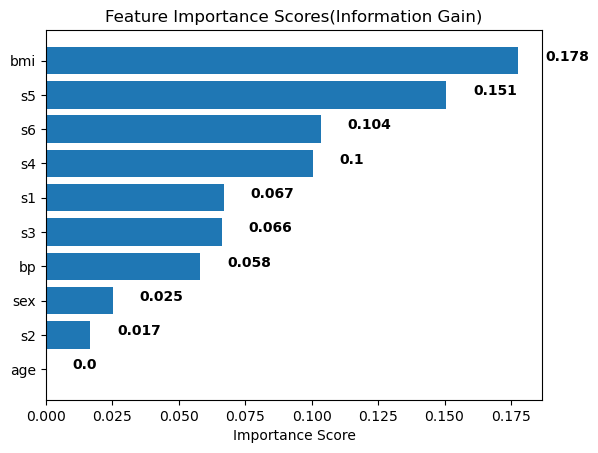

In [6]:
# we will visualize the sorted feature importance scores a horizontal bar chart.

#plot a horizontal bar chart of the feature importance scores
fig, ax=plt.subplots()
y_pos=np.arange(len(sorted_features))
ax.barh(y_pos,[score for feature, score in sorted_features], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Importance Score')
ax.set_title('Feature Importance Scores(Information Gain)')

#add importance scores as labels on the horizontal bar chart
for i,v in enumerate([score for feature, score in sorted_features]):
    ax.text(v+0.01,i,str(round(v,3)),color='black',fontweight='bold')
plt.show()

The results are as follows:
    1. Body mass index(bmi) has the highest importance score(0.174), indicating that it has the most significant
    influence on the target variable in the diabetes dataset.
    
    2. Serum measurement 5 (s5) follows with a score of 0.148
    3. Serum measurement 6 & 4 (s6) (s6) have moderate importance scores ranging 0.103 to 0.111
    4. remaining features have relatively lower importance scores.
    

# Chi-square test- A greater Chi-square score shows a stronger link between the feature and the target. It is typically used for categorical data where the features and target variables are discrete.

# Fisher`s Discriminant Ratio, commonly known as Fisher`s score is a feature selection approach that ranks features based on their ability to differentiate various classes in a dataset.


# Missing value ratio: makes decisions based on the number of missing values in a feature. set the threshold for the acceptable missing value ratio

___________________________________________________________________________________________________________________________

In [7]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# Wrapper based approach
# Forward Selection

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#load the breast cancer dataset
data=load_breast_cancer()

# split the dataset into features and target
X=data.data
y=data.target



In [9]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
#split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#Define the logistic regression model
model=LogisticRegression()

#Define the forward selection object
sfs=SFS(model,k_features=5,
       forward=True,
       floating=False,
       scoring='accuracy',
       cv=5)

#perform forward selection on the training dataset
sfs.fit(X_train,y_train)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [11]:
X_train.shape

(398, 30)

Selected Features: ('0', '1', '4', '21', '22')
Accuracy: 0.9548417721518987


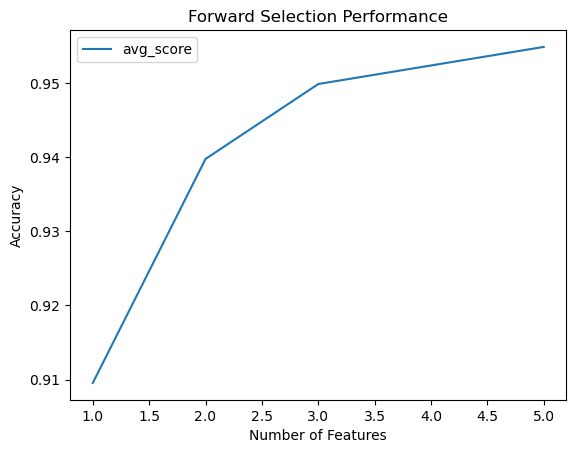

In [12]:
# printing the selected features 

print('Selected Features:', sfs.k_feature_names_)

#Evaluate the performance of the selected features on the testing set
accuracy=sfs.k_score_
print('Accuracy:',accuracy)

#Plot the performance of the model with different feature subsets

sfs_df=pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df['avg_score']=sfs_df['avg_score'].astype(float)
fig,ax=plt.subplots()
sfs_df.plot(kind='line',y='avg_score',ax=ax)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Forward Selection Performance')
plt.show()

Out put shows with just 1 feature the model achieves an accuracy of around 91%

adding second feature increases the accuracy to 94%. with 3 features, the accuracy improves
to 95%.

including 4 features pushes the accuracy slightly above 95%. beyond 4 featues, the improvements
in accuracy become less significant.

# Backward Selection: You begin with the entire feature set and gradually eliminate features from it.

# Exhaustive Feature Selection:Compares the performance of all possible feature subsets and chooses the best performaing subset

# Recursive Feature Elimination: Starts with the whole feature set and eliminates featues repeatedly depending on their relevance as judged by the learning algorithm.

________________________________________________________________________________________________________

# Embedded Approach:  include the feature selection process as part of the learning algorithm. they are effective than wrapper methods since they do not require an external feature selection procedure.

# Regularization:- is a method that adds a penalty term to the loss function to prevent overfitting


# Random Forest Importance: is an ensemble learning approach that combines the predictions of several decision trees.

# The aim of the Covertype dataset is to predict the forest cover type(the dominant tree species) within the Roosevelt National Forest of Northern Colorado

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#load the covertype dataset
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz',header=None)
cols=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
      'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']+['Wilderness_Area_'+str(i) for i in range(1,5)]+['Soil_Type_'+str(i) for i in range(1,41)]+['Cover_Type']
data.columns=cols

In [18]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [55]:
#Split the dataset into train and test sets
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

#create a random forest classifier object
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

#Fit the model to the training data
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [80]:
import numpy as np
#Get feature importances from the trained model
importances=rfc.feature_importances_

#sort the feature importances in descending order

indices=np.argsort(importances)[::-1]

#select the top 10 features
num_features=10
top_indices=indices[:num_features]
top_importances=importances[top_indices]

#print the top 10 feature rankings
print('top 10 feature rankings:')

for f in range(num_features):
    print(f"{f+1}.Features{indices[f]}: {importances[indices [f]]}")
                                   

top 10 feature rankings:
1.Features7: 0.1419344436315119
2.Features27: 0.12713637963171595
3.Features23: 0.11821685833472201
4.Features6: 0.08055701642634591
5.Features20: 0.07797474929691814
6.Features22: 0.07429212194132524
7.Features2: 0.060092333477412795
8.Features3: 0.05381045367561502
9.Features26: 0.04107957505964944
10.Features0: 0.032311888273301004


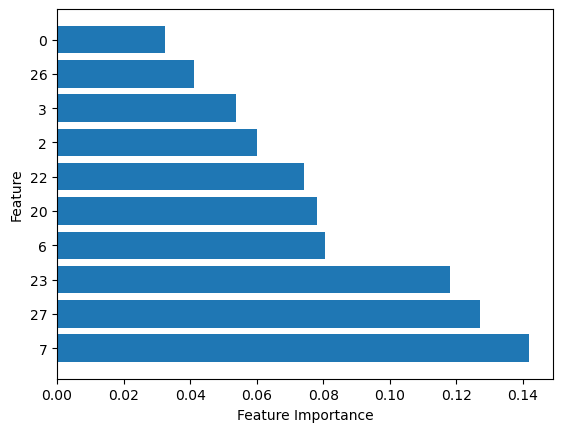

In [76]:
# plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align='center')
plt.yticks(range(num_features),top_indices)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Unsupervised Feature Selection Techniques

Unsupervised feature selection approaches can be used in order to reduce the dimensionality of the dataset


# Prinicipal Component Analysis

In [83]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#load the wine dataset
wine=load_wine()
X=wine.data
y=wine.target
feature_names=wine.feature_names

In [84]:
#Standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [86]:
#perform PCA
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

In [87]:
#calculate the explained variance
explained_variance_ratio=pca.explained_variance_ratio_

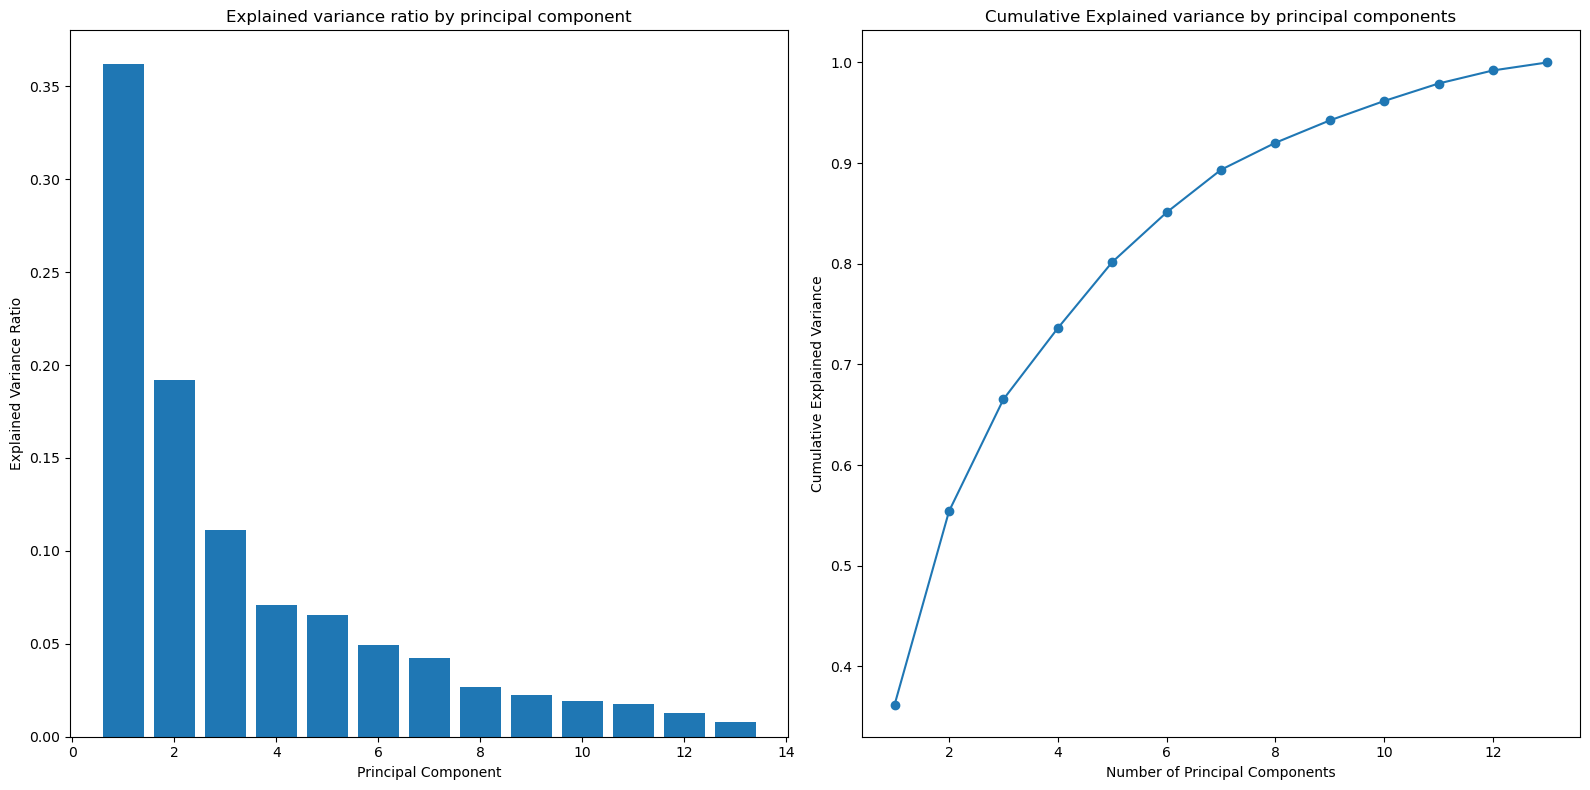

In [91]:
#create a 2*1 grid of subplots
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,8))

#plot the explained variabce ratio in the first subplot
ax1.bar(range(1,len(explained_variance_ratio)+1),explained_variance_ratio)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained variance ratio by principal component')

#calculate the cumulative explained variance
cumulative_explained_variance=np.cumsum(explained_variance_ratio)
#plot the cumulative explained variance in the second subplot
ax2.plot(range(1,len(cumulative_explained_variance)+1),cumulative_explained_variance,marker='o')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained variance by principal components')
#display the figure
plt.tight_layout()
plt.show()